In [1]:
!nvidia-smi

Sat Jun 12 11:22:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
Train_datagen=ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, preprocessing_function=preprocess_input)
Training_Set=Train_datagen.flow_from_directory('/content/drive/MyDrive/Mask_Detection_Kaggle/train', target_size=(224, 224), batch_size=64, class_mode='categorical')

Found 6000 images belonging to 2 classes.


In [5]:
Test_datagen=ImageDataGenerator(rescale=1/255)
Test_Set=Test_datagen.flow_from_directory('/content/drive/MyDrive/Mask_Detection_Kaggle/validation', target_size=(224, 224), batch_size=64, class_mode='categorical')

Found 1563 images belonging to 2 classes.


In [6]:
vgg=VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
for layer in vgg.layers:
  layer.trainable=False

In [9]:
x=Flatten()(vgg.output)
DL=Dense(2, activation='softmax')(x)
model=Model(inputs=vgg.input, outputs=DL)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(Training_Set, validation_data=(Test_Set), epochs=10, steps_per_epoch=len(Training_Set), validation_steps=len(Test_Set))

Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.2745 - accuracy: 0.8988 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


94/94 [==============================] - 1976s 21s/step - loss: 0.2745 - accuracy: 0.8988 - val_loss: 0.2558 - val_accuracy: 0.8925
Epoch 2/10
94/94 [==============================] - 80s 846ms/step - loss: 0.0596 - accuracy: 0.9830 - val_loss: 0.2003 - val_accuracy: 0.9213
Epoch 3/10
94/94 [==============================] - 79s 842ms/step - loss: 0.0401 - accuracy: 0.9897 - val_loss: 0.2612 - val_accuracy: 0.8868
Epoch 4/10
94/94 [==============================] - 80s 850ms/step - loss: 0.0315 - accuracy: 0.9920 - val_loss: 0.2315 - val_accuracy: 0.9098
Epoch 5/10
94/94 [==============================] - 79s 843ms/step - loss: 0.0240 - accuracy: 0.9938 - val_loss: 0.2414 - val_accuracy: 0.9002
Epoch 6/10
94/94 [==============================] - 79s 842ms/step - loss: 0.0203 - accuracy: 0.9958 - val_loss: 0.2493 - val_accuracy: 0.8964
Epoch 7/10
94/94 [==============================] - 80s 846ms/step - loss: 0.0153 - accuracy: 0.9973 - val_loss: 0.2195 - val_accuracy: 0.9072
Epoch 8/10

In [12]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Mask_Detection_Kaggle/model_vgg16_Object_Detection.h5')

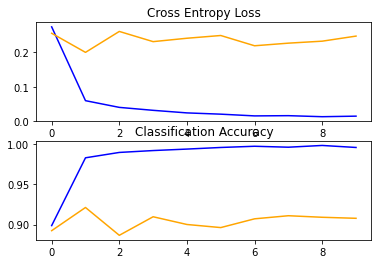

In [13]:
summarize_diagnostics(history=history)

# Predictions

## 1

In [15]:
from keras.preprocessing import image
from PIL import Image
import matplotlib.image as mpimg

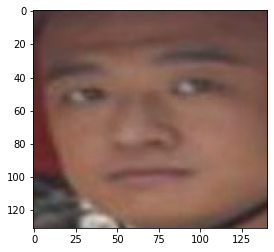

In [27]:
img=mpimg.imread('/content/drive/MyDrive/Mask_Detection_Kaggle/validation/without_mask/without_mask_3001.jpg')
imgplot=plt.imshow(img)
plt.show()

In [28]:
image_1=Image.open('/content/drive/MyDrive/Mask_Detection_Kaggle/validation/without_mask/without_mask_3001.jpg')
print(image_1.size)
new_image=image_1.resize((224, 224))
print(new_image.size)

(141, 131)
(224, 224)


In [29]:
Pred_image=image.img_to_array(new_image)
Pred_image=np.expand_dims(Pred_image, axis=0)
result=model.predict(Pred_image)
result=result.reshape(-1)
print(result)

[0. 1.]


## 2

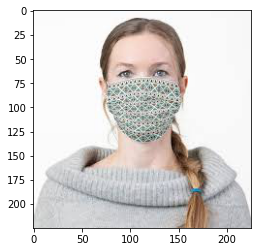

In [30]:
img=mpimg.imread('/content/drive/MyDrive/Mask_Detection_Kaggle/validation/with_mask/with_mask_3004.jpg')
imgplot=plt.imshow(img)
plt.show()

In [31]:
image_1=Image.open('/content/drive/MyDrive/Mask_Detection_Kaggle/validation/with_mask/with_mask_3004.jpg')
print(image_1.size)
new_image=image_1.resize((224, 224))
print(new_image.size)

(225, 225)
(224, 224)


In [32]:
Pred_image=image.img_to_array(new_image)
Pred_image=np.expand_dims(Pred_image, axis=0)
result=model.predict(Pred_image)
result=result.reshape(-1)
print(result)

[1. 0.]
